# **SVM**
---
##Author: Emmanuel Paalam
##V1: Simple imputation
##Target variable: F3EVERDO

##Import dataset, confirm shape

In [2]:
import pandas as pd
from google.colab import drive

drive.mount("/content/drive")
## Insert pathway to dataset below
df = pd.read_csv("/content/drive/My Drive/research/SURP 2024/colab/data/processed/epaalam-SIMPLEprocessed_els_02_12_byf3pststu_v1_0.csv")

df.shape

Mounted at /content/drive


(13119, 212)

In [3]:
df.dropna(inplace=True)
df.shape

(13119, 212)

## Split data

In [4]:
y = df['F3EVERDO']
y.shape

(13119,)

In [5]:
X = df.drop(columns='F3EVERDO', axis=1)
X.shape

(13119, 211)

In [6]:
from sklearn.model_selection import train_test_split, cross_validate

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=58, stratify=y)
print(f"{X_train.shape}, {X_test.shape}, {y_train.shape}, {y_test.shape}")

(10495, 211), (2624, 211), (10495,), (2624,)


## Develop model

### 5-fold cross-validation

In [11]:
from sklearn.svm import SVC

model = SVC(kernel='poly', random_state=71, probability=True)

In [12]:
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']
cv_results = cross_validate(model, X_train, y_train, scoring=scoring, cv=5, return_train_score=False)

print("Cross-validation results:")
print("  Accuracy: {:.2f}".format(cv_results['test_accuracy'].mean()))
print("  Precision: {:.2f}".format(cv_results['test_precision_weighted'].mean()))
print("  Recall: {:.2f}".format(cv_results['test_recall_weighted'].mean()))
print("  F1-score: {:.2f}".format(cv_results['test_f1_weighted'].mean()))

Cross-validation results:
  Accuracy: 0.94
  Precision: 0.94
  Recall: 0.94
  F1-score: 0.94


###Train, test, and evaluate final model

Accuracy: 0.9477896341463414
Precision: 0.8888888888888888
Recall: 0.562962962962963
F1 Score: 0.689342403628118
ROC-AUC: 0.8770367223638252
Specificity: 0.991928632115548
Test Negative Predictive Value (NPV): 0.9518956379942927
Confusion Matrix:
[[2335   19]
 [ 118  152]]


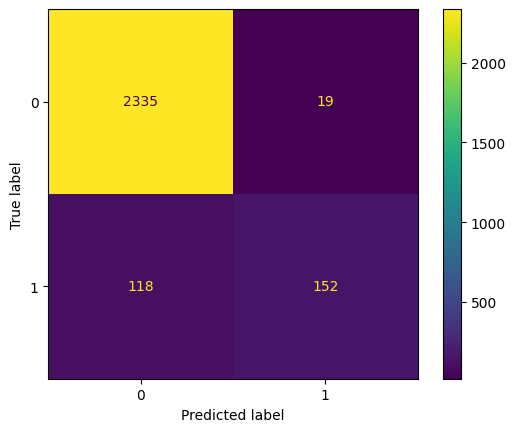

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)
test_npv = tn / (tn + fn)

# Print the metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC-AUC: {roc_auc}")
print(f"Specificity: {specificity}")
print(f'Test Negative Predictive Value (NPV): {test_npv}')
print("Confusion Matrix:")
print(conf_matrix)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()